In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import re
import geopandas as gpd
from functions import getTradingPartners
from functions import getData

In [69]:
basePath = 'C:/Users/Krist/University College London/Digital Visualisation/Final Project/'
countries = gpd.read_file(basePath+'Data Sources/countries (1)/ne_50m_admin_0_countries.shp').fillna(value='None')
airports = pd.read_csv(basePath+'Final Data/airports.csv',index_col=0)
ports = pd.read_csv(basePath+'Final Data/ports.csv',index_col=0)
globalData = pd.read_csv(basePath+'Final Data/globalData_reCat.csv',index_col=0)
ukports = pd.read_csv(basePath+'Final Data/UKports_kln.csv',index_col=0)
ukairports = pd.read_csv(basePath+'Final Data/UKFreightAirports.csv',index_col=0)

In [70]:
ukairports

,airport_name,iata_code,size,usage,name,iso3,reporting_airport_group_name,scalerank_left,location,gps_code,...,freight_set_down_scheduled_foreign_non_eu,freight_picked_up_scheduled_foreign_non_eu,freight_set_down_charter_uk,freight_picked_up_charter_uk,freight_set_down_charter_foreign_eu,freight_picked_up_charter_foreign_eu,freight_set_down_charter_foreign_non_eu,freight_picked_up_charter_foreign_non_eu,code,busiest_ukairports
0,London Heathrow,LHR,major,civilian,United Kingdom,GBR,London Area Airports,2,parking,EGLL,...,451.446089,456.260036,0.096692,0.054093,2.653779,12.860816,0.009275,0.029429,LHR,1
1,Manchester Int'l,MAN,major,civilian,United Kingdom,GBR,Other UK Airports,6,terminal,EGCC,...,51.539481,45.074428,1.201094,1.022965,0.047683,0.399037,0.027279,0.022211,MAN,1
2,London Gatwick,LGW,major,civilian,United Kingdom,GBR,London Area Airports,6,terminal,EGKK,...,18.819321,25.993287,1.489828,1.614273,0.019546,0.032184,0.000000,0.000000,LGW,1
3,Birmingham Int'l,BHX,major,civilian,United Kingdom,GBR,Other UK Airports,6,terminal,EGBB,...,22.799901,16.368187,0.497846,0.231183,0.066066,0.139888,0.180518,0.167369,BHX,1
4,London Luton,LTN,major,civilian,United Kingdom,GBR,London Area Airports,8,terminal,EGGW,...,3.028928,1.526382,0.003492,0.004602,0.000000,0.000000,0.000000,0.000000,LTN,1
5,Glasgow Prestwick,PIK,mid,civilian,United Kingdom,GBR,Other UK Airports,7,terminal,EGPK,...,0.006272,0.142890,0.374272,0.240922,6.320881,4.670083,0.000000,0.000000,PIK,0
6,Glasgow Int'l,GLA,major,civilian,United Kingdom,GBR,Other UK Airports,4,terminal,EGPF,...,5.879275,9.146351,0.014407,0.019790,0.000000,0.000058,0.001701,0.000000,GLA,0
7,Glasgow Prestwick,PIK,mid,civilian,United Kingdom,GBR,Other UK Airports,7,terminal,EGPK,...,0.000000,0.000000,0.000000,0.000000,0.005071,0.010250,0.105767,0.460654,PIK,0
8,Newcastle Int'l,NCL,major,civilian,United Kingdom,GBR,Other UK Airports,8,terminal,EGNT,...,2.780963,2.178561,0.000000,0.000000,0.000000,0.000000,0.187729,0.319432,NCL,0
9,Sumburgh,LSI,mid,civilian,None,None,Other UK Airports,8,runway,EGPB,...,0.000000,0.000000,0.083168,0.058161,0.002484,0.000710,0.000000,0.000000,LSI,0


In [71]:
def cleanName(whatToClean,remove=None):
    
    if type(whatToClean) == list:
        
        cleaned = []
        
        for element in whatToClean:
            if remove != None:
                cleaned.append(" ".join([ele.capitalize() for ele in re.split(' ',element) if ele != remove]))
            else:
                cleaned.append(" ".join([ele.capitalize() for ele in re.split(' ',element)]))
        print(cleaned)
        
    else:
        if remove != None:
            cleaned = " ".join([ele.capitalize() for ele in re.split(' ',whatToClean) if ele != remove])
        else:
            cleaned = " ".join([ele.capitalize() for ele in re.split(' ',whatToClean)])
        
    return cleaned 

### Getting a sense of that the datasets contains

In [72]:
airports.columns

Index(['scalerank_left', 'airport_name', 'abbrev', 'location', 'gps_code',
       'iata_code', 'wikipedia', 'wdid_score', 'ne_id', 'name', 'iso3', 'size',
       'usage', 'top_20_busiest_airports', 'busiest_airport_ranking',
       'amount_passed_through', 'code', 'busiest-airports-uk'],
      dtype='object')

In [73]:
airports.usage.unique()

array(['civilian', 'military/civilian', 'military', 'spaceport'],
      dtype=object)

In [74]:
airports['size'].unique()

array(['small', 'mid', 'major'], dtype=object)

In [75]:
ports.columns

Index(['port_name', 'iso3', 'country_name', 'latitude', 'longitude',
       'harborsize', 'harbortype', 'railway', 'top_20_busiest_ports',
       'busiest_ports_ranking', 'amount_shipped_through', 'code',
       'busiest_ukports'],
      dtype='object')

In [76]:
ports.harborsize.unique()

array(['V', 'S', 'M', 'L', 'None'], dtype=object)

In [77]:
ports.fillna('None').railway.unique()

array(['None', 'M', 'L', 'S'], dtype=object)

In [78]:
ports.railway.unique()

array(['None', 'M', 'L', 'S'], dtype=object)

In [79]:
countries.columns

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

In [80]:
globalData.columns

Index(['organic_products_export', 'chemicals_export', 'material_export',
       'clothing_export', 'metals_export', 'technical_export',
       'transportation_export', 'miscellaneous_goods_export',
       'all_commodities_export', 'organic_products_import', 'chemicals_import',
       'material_import', 'clothing_import', 'metals_import',
       'technical_import', 'transportation_import',
       'miscellaneous_goods_import', 'all_commodities_import', 'iso3',
       'freight_2017', 'passengers_2017', 'name', 'normalised_export_2017',
       'normalised_import_2017', 'normalised_freight_2017',
       'normalised_passengers_2017', 'code'],
      dtype='object')

In [81]:
globalData.loc[0]

organic_products_export          0.25
chemicals_export                 0.02
material_export                   0.5
clothing_export                  0.99
metals_export                    0.35
technical_export                 0.11
transportation_export            0.02
miscellaneous_goods_export       0.06
all_commodities_export            2.3
organic_products_import           0.9
chemicals_import                 0.48
material_import                  1.47
clothing_import                  0.57
metals_import                    0.53
technical_import                 0.77
transportation_import            0.37
miscellaneous_goods_import       0.19
all_commodities_import           5.27
iso3                              ALB
freight_2017                        0
passengers_2017                103151
name                          Albania
normalised_export_2017        1.19392
normalised_import_2017        1.83578
normalised_freight_2017             0
normalised_passengers_2017     11.544
code        

In [82]:
print('Maximum:',globalData.all_commodities_export.max(),'\nMinimum:',globalData.all_commodities_export.min())

Maximum: 2258.09 
Minimum: 0.01


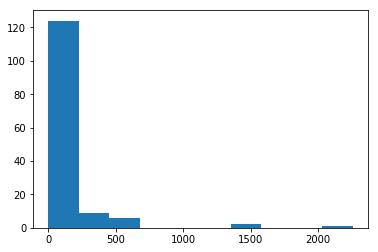

In [83]:
plt.hist(globalData.all_commodities_export)
plt.show()

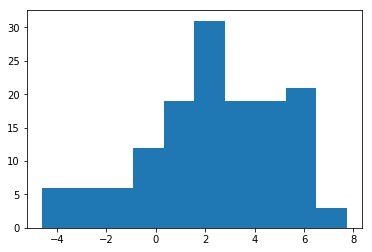

In [84]:
plt.hist(np.log(globalData.all_commodities_export))
plt.show()

In [85]:
print('Maximum:',globalData.normalised_export_2017.max(),'\nMinimum:',globalData.normalised_export_2017.min())

Maximum: 7.722717356311836 
Minimum: 0.009950330853168092


In [86]:
print('Maximum:',globalData.all_commodities_import.max(),'\nMinimum:',globalData.all_commodities_import.min())

Maximum: 2316.25 
Minimum: 0.15


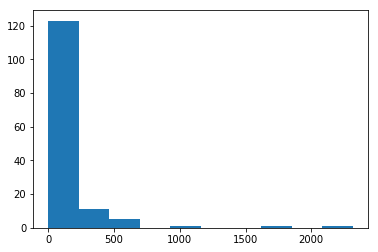

In [87]:
plt.hist(globalData.all_commodities_import)
plt.show()

In [88]:
print('Maximum:',globalData.normalised_import_2017.max(),'\nMinimum:',globalData.normalised_import_2017.min())

Maximum: 7.748136416755942 
Minimum: 0.13976194237515865


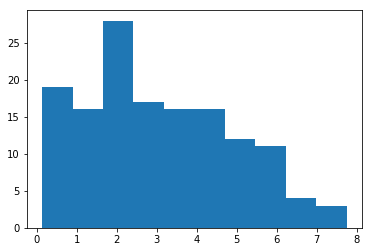

In [89]:
plt.hist(np.log(1+globalData.all_commodities_import))
plt.show()

In [90]:
print('Maximum:',globalData.passengers_2017.max(),'\nMinimum:',globalData.passengers_2017.min())

Maximum: 849403000.0 
Minimum: 0.0


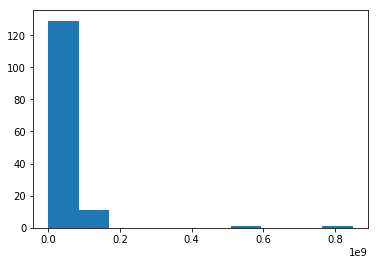

In [91]:
plt.hist(globalData.passengers_2017)
plt.show()

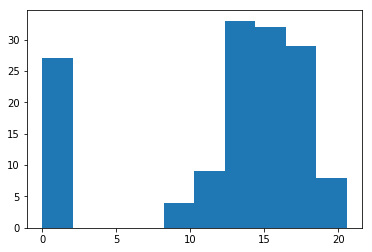

In [92]:
plt.hist(np.log(1+globalData.passengers_2017))
plt.show()

In [93]:
print('Maximum:',globalData.normalised_passengers_2017.max(),'\nMinimum:',globalData.normalised_passengers_2017.min())

Maximum: 20.56004430891938 
Minimum: 0.0


In [94]:
print('Maximum:',globalData.freight_2017.max(),'\nMinimum:',globalData.freight_2017.min())

Maximum: 41591.55 
Minimum: 0.0


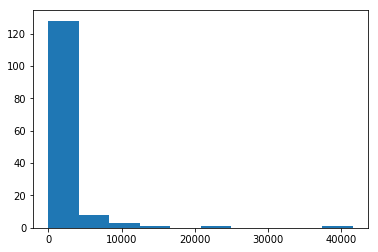

In [95]:
plt.hist(globalData.freight_2017)
plt.show()

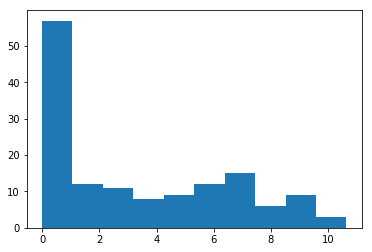

In [96]:
plt.hist(np.log(1+globalData.freight_2017))
plt.show()

In [97]:
print('Maximum:',globalData.normalised_freight_2017.max(),'\nMinimum:',globalData.normalised_freight_2017.min())

Maximum: 10.635676343672985 
Minimum: 0.0


### Let's write some csv's!

#### First the top importers/exporters

In [98]:
globalData

,organic_products_export,chemicals_export,material_export,clothing_export,metals_export,technical_export,transportation_export,miscellaneous_goods_export,all_commodities_export,organic_products_import,...,all_commodities_import,iso3,freight_2017,passengers_2017,name,normalised_export_2017,normalised_import_2017,normalised_freight_2017,normalised_passengers_2017,code
0,0.25,0.02,0.50,0.99,0.35,0.11,0.02,0.06,2.30,0.90,...,5.27,ALB,0.00,103151.0,Albania,1.193922,1.835776,0.000000,11.543959,ALB
1,0.35,0.78,33.96,0.00,0.01,0.06,0.02,0.01,35.19,9.42,...,46.05,DZA,24.80,6241924.0,Algeria,3.588783,3.851211,3.250374,15.646799,DZA
2,0.00,0.00,0.02,0.01,0.01,0.04,0.02,0.02,0.12,0.34,...,1.48,AND,0.00,0.0,Andorra,0.113329,0.908259,0.000000,0.000000,AND
3,33.02,11.40,154.37,0.46,10.23,7.67,3.59,3.86,224.60,15.33,...,217.12,AUS,1982.59,74257326.0,Australia,5.418764,5.385045,7.592664,18.123047,AUS
4,12.56,17.69,28.44,4.70,22.40,45.03,19.52,9.51,159.85,13.52,...,166.42,AUT,391.27,16171640.0,Austria,5.080472,5.120506,5.971950,16.598770,AUT
5,0.63,0.03,0.97,0.13,0.27,0.04,0.01,0.06,2.14,0.72,...,3.89,ARM,0.00,0.0,Armenia,1.144223,1.587192,0.000000,0.000000,ARM
6,45.21,97.62,107.85,19.18,33.00,44.92,51.44,21.39,420.60,40.16,...,402.07,BEL,1513.99,13676844.0,Belgium,6.044057,5.999110,7.323164,16.431215,BEL
7,0.55,0.55,1.61,0.71,1.10,0.74,0.19,0.83,6.28,1.80,...,10.43,BIH,0.00,0.0,Bosnia and Herz.,1.985131,2.436241,0.000000,0.000000,BIH
8,79.26,10.63,70.04,1.70,16.31,17.28,19.84,2.53,217.60,11.20,...,150.75,BRA,1736.55,96395709.0,Brazil,5.387244,5.022234,7.460231,18.383972,BRA
9,0.01,0.20,5.01,0.01,0.03,0.10,0.04,0.15,5.56,0.47,...,3.08,BRN,132.61,1172201.0,Brunei,1.880991,1.406097,4.894925,13.974395,BRN


In [99]:
top_five_importers = globalData.sort_values(by=['all_commodities_import'],ascending=False)[['all_commodities_import','name','iso3']]
top_five_importers = top_five_importers.reset_index(drop=True).loc[0:4]
top_five_importers = top_five_importers[['name','all_commodities_import','iso3']]
top_five_importers['all_commodities_import'] = top_five_importers['all_commodities_import'].astype(int)
top_five_importers.columns = ['name','value','code']
top_five_importers['name'] = cleanName(list(top_five_importers.name))

['United States Of America', 'China', 'Germany', 'Japan', 'United Kingdom']


In [100]:
top_five_importers

,name,value,code
0,United States Of America,2316,USA
1,China,1829,CHN
2,Germany,1153,DEU
3,Japan,660,JPN
4,United Kingdom,627,GBR


In [101]:
top_five_exporters = globalData.sort_values(by=['all_commodities_export'],ascending=False)[['all_commodities_export','name','iso3']]
top_five_exporters = top_five_exporters.reset_index(drop=True).loc[0:4]
top_five_exporters = top_five_exporters[['name','all_commodities_export','iso3']]
top_five_exporters['all_commodities_export'] = (top_five_exporters['all_commodities_export']).astype(int)
top_five_exporters.columns = ['name','value','code']
top_five_exporters['name'] = cleanName(list(top_five_exporters.name))

['China', 'United States Of America', 'Germany', 'Japan', 'South Korea']


In [102]:
top_five_exporters

,name,value,code
0,China,2258,CHN
1,United States Of America,1503,USA
2,Germany,1408,DEU
3,Japan,654,JPN
4,South Korea,573,KOR


In [103]:
top_five_importers.to_csv(basePath+'Layers/StylingDataDriven/top_five_importers.csv',header=True,index=False)
top_five_exporters.to_csv(basePath+'Layers/StylingDataDriven/top_five_exporters.csv',header=True,index=False)

#### Now the top 5 busiest airports

In [104]:
airports.columns

Index(['scalerank_left', 'airport_name', 'abbrev', 'location', 'gps_code',
       'iata_code', 'wikipedia', 'wdid_score', 'ne_id', 'name', 'iso3', 'size',
       'usage', 'top_20_busiest_airports', 'busiest_airport_ranking',
       'amount_passed_through', 'code', 'busiest-airports-uk'],
      dtype='object')

In [105]:
airports.head()

,scalerank_left,airport_name,abbrev,location,gps_code,iata_code,wikipedia,wdid_score,ne_id,name,iso3,size,usage,top_20_busiest_airports,busiest_airport_ranking,amount_passed_through,code,busiest-airports-uk
0,9,Sahnewal,LUH,terminal,VILD,LUH,http://en.wikipedia.org/wiki/Sahnewal_Airport,4,1159113785,India,IND,small,civilian,0,0,0.0,LUH,0
1,9,Solapur,SSE,terminal,VASL,SSE,http://en.wikipedia.org/wiki/Solapur_Airport,4,1159113803,India,IND,mid,civilian,0,0,0.0,SSE,0
2,9,Birsa Munda,IXR,terminal,VERC,IXR,http://en.wikipedia.org/wiki/Birsa_Munda_Airport,4,1159113831,India,IND,mid,civilian,0,0,0.0,IXR,0
3,9,Ahwaz,AWZ,terminal,OIAW,AWZ,http://en.wikipedia.org/wiki/Ahwaz_Airport,4,1159113845,Iran,IRN,mid,civilian,0,0,0.0,AWZ,0
4,9,Gwalior,GWL,terminal,VIGR,GWL,http://en.wikipedia.org/wiki/Gwalior_Airport,4,1159113863,India,IND,mid,military/civilian,0,0,0.0,GWL,0


In [106]:
top_five_airports = airports[airports.busiest_airport_ranking!=0].sort_values(by=['busiest_airport_ranking'],ascending=True)\
                    [['airport_name','iata_code','amount_passed_through','busiest_airport_ranking']]
top_five_airports = top_five_airports.reset_index(drop=True).loc[0:4]
top_five_airports = top_five_airports[['airport_name','amount_passed_through','iata_code']]
top_five_airports.columns = ['name','value','code']
top_five_airports['value'] = top_five_airports['value'].round(2)
top_five_airports['name'] = cleanName(list(top_five_airports.name),"Int'l")

['Hong Kong', 'Memphis', 'Shanghai Pudong', 'Incheon', 'Anchorage']


In [107]:
top_five_airports

,name,value,code
0,Hong Kong,5049.90,HKG
1,Memphis,4336.75,MEM
2,Shanghai Pudong,3824.28,PVG
3,Incheon,2921.69,ICN
4,Anchorage,2713.23,ANC


In [108]:
top_five_airports.to_csv(basePath+'Layers/StylingDataDriven/top_five_airports.csv',header=True,index=False)

#### On to the busiest ports

In [109]:
ports.columns

Index(['port_name', 'iso3', 'country_name', 'latitude', 'longitude',
       'harborsize', 'harbortype', 'railway', 'top_20_busiest_ports',
       'busiest_ports_ranking', 'amount_shipped_through', 'code',
       'busiest_ukports'],
      dtype='object')

In [110]:
top_five_ports = ports[ports.busiest_ports_ranking!=0].sort_values(by=['busiest_ports_ranking'],ascending=True)\
                    [['port_name','amount_shipped_through','busiest_ports_ranking']]
top_five_ports = top_five_ports.reset_index(drop=True).loc[0:4]
top_five_ports = top_five_ports[['port_name','amount_shipped_through','port_name']]
top_five_ports.columns = ['name','value','code']
top_five_ports['name'] = cleanName(list(top_five_ports.name))

['Shanghai', 'Serangoon Harbor', 'Chiwan', 'Ningbo', 'Hong Kong']


In [111]:
top_five_ports

,name,value,code
0,Shanghai,40233,SHANGHAI
1,Serangoon Harbor,33666,SERANGOON HARBOR
2,Chiwan,25208,CHIWAN
3,Ningbo,24607,NINGBO
4,Hong Kong,20770,HONG KONG


In [112]:
top_five_ports.to_csv(basePath+'Layers/StylingDataDriven/top_five_ports.csv',header=True,index=False)

#### UK airports

In [113]:
ukairports.head()

,airport_name,iata_code,size,usage,name,iso3,reporting_airport_group_name,scalerank_left,location,gps_code,...,freight_set_down_scheduled_foreign_non_eu,freight_picked_up_scheduled_foreign_non_eu,freight_set_down_charter_uk,freight_picked_up_charter_uk,freight_set_down_charter_foreign_eu,freight_picked_up_charter_foreign_eu,freight_set_down_charter_foreign_non_eu,freight_picked_up_charter_foreign_non_eu,code,busiest_ukairports
0,London Heathrow,LHR,major,civilian,United Kingdom,GBR,London Area Airports,2,parking,EGLL,...,451.446089,456.260036,0.096692,0.054093,2.653779,12.860816,0.009275,0.029429,LHR,1
1,Manchester Int'l,MAN,major,civilian,United Kingdom,GBR,Other UK Airports,6,terminal,EGCC,...,51.539481,45.074428,1.201094,1.022965,0.047683,0.399037,0.027279,0.022211,MAN,1
2,London Gatwick,LGW,major,civilian,United Kingdom,GBR,London Area Airports,6,terminal,EGKK,...,18.819321,25.993287,1.489828,1.614273,0.019546,0.032184,0.000000,0.000000,LGW,1
3,Birmingham Int'l,BHX,major,civilian,United Kingdom,GBR,Other UK Airports,6,terminal,EGBB,...,22.799901,16.368187,0.497846,0.231183,0.066066,0.139888,0.180518,0.167369,BHX,1
4,London Luton,LTN,major,civilian,United Kingdom,GBR,London Area Airports,8,terminal,EGGW,...,3.028928,1.526382,0.003492,0.004602,0.000000,0.000000,0.000000,0.000000,LTN,1


In [114]:
ukairports.columns

Index(['airport_name', 'iata_code', 'size', 'usage', 'name', 'iso3',
       'reporting_airport_group_name', 'scalerank_left', 'location',
       'gps_code', 'wikipedia', 'name.1', 'total_freight',
       'freight_set_down_scheduled_uk', 'freight_picked_up_scheduled_uk',
       'freight_set_down_scheduled_foreign_eu',
       'freight_picked_up_scheduled_foreign_eu',
       'freight_set_down_scheduled_foreign_non_eu',
       'freight_picked_up_scheduled_foreign_non_eu',
       'freight_set_down_charter_uk', 'freight_picked_up_charter_uk',
       'freight_set_down_charter_foreign_eu',
       'freight_picked_up_charter_foreign_eu',
       'freight_set_down_charter_foreign_non_eu',
       'freight_picked_up_charter_foreign_non_eu', 'code',
       'busiest_ukairports'],
      dtype='object')

In [115]:
top_five_ukairports = ukairports.sort_values(by=['total_freight'],ascending=False)[['airport_name','total_freight','iata_code']]
top_five_ukairports = top_five_ukairports.reset_index(drop=True).loc[0:4]
top_five_ukairports.columns = ['name','value','code']
top_five_ukairports['value'] = top_five_ukairports['value'].round(2)
top_five_ukairports['name'] = cleanName(list(top_five_ukairports.name),"Int'l")

['London Heathrow', 'Manchester', 'London Gatwick', 'Birmingham', 'London Luton']


In [116]:
top_five_ukairports

,name,value,code
0,London Heathrow,1698.46,LHR
1,Manchester,120.18,MAN
2,London Gatwick,96.98,LGW
3,Birmingham,41.80,BHX
4,London Luton,21.03,LTN


In [117]:
top_five_ukairports.to_csv(basePath+'Layers/StylingDataDriven/top_five_ukairports.csv',header=True,index=False)

#### Finally, the UK ports

In [118]:
ukports.head()

,domestic_traffic_inwards,domestic_traffic_outwards,european_union_traffic_inwards,european_union_traffic_outwards,non-eu_foreign_traffic_inwards,non-eu_foreign_traffic_outwards,Total,port_name,iso3,country_name,latitude,longitude,harborsize,harbortype,railway,top_20_busiest_ports,busiest_ports_ranking,amount_shipped_through,busiest_UKports
Aberdeen,1536.467,1796.029,238.273,201.741,172.942,112.968,4058.420,ABERDEEN,GBR,United Kingdom,57.150000,-2.083333,M,river,None,0,0,0,0
Belfast,5998.598,5767.772,2662.600,1109.972,2512.152,174.836,18225.930,BELFAST,GBR,United Kingdom,54.616667,-5.900000,L,river,S,0,0,0,0
Boston,0.000,0.000,601.379,116.588,18.393,2.052,738.412,BOSTON,GBR,United Kingdom,52.966667,-0.016667,S,river,S,0,0,0,0
Bristol,1906.920,145.195,1611.869,677.590,3686.488,712.625,8740.687,BRISTOL,GBR,United Kingdom,51.466667,-2.633333,M,river,S,0,0,0,0
Cardiff,1046.743,54.824,346.492,37.398,88.082,0.000,1573.539,CARDIFF,GBR,United Kingdom,51.450000,-3.166667,M,coastal,S,0,0,0,0


In [119]:
ukports.columns

Index(['domestic_traffic_inwards', 'domestic_traffic_outwards',
       'european_union_traffic_inwards', 'european_union_traffic_outwards',
       'non-eu_foreign_traffic_inwards', 'non-eu_foreign_traffic_outwards',
       'Total', 'port_name', 'iso3', 'country_name', 'latitude', 'longitude',
       'harborsize', 'harbortype', 'railway', 'top_20_busiest_ports',
       'busiest_ports_ranking', 'amount_shipped_through', 'busiest_UKports'],
      dtype='object')

In [120]:
top_five_ukports = ukports.sort_values(by=['Total'],ascending=False)[['Total','port_name','port_name']]
top_five_ukports.index=np.arange(top_five_ukports.shape[0])
top_five_ukports = top_five_ukports.loc[0:4]
top_five_ukports.columns = ['Total','port_name_1','port_name_2']
top_five_ukports = top_five_ukports[['port_name_1','Total','port_name_2']]
top_five_ukports.columns = ['name','value','code']
top_five_ukports['value'] = top_five_ukports['value'].round(2)
top_five_ukports['name'] = cleanName(list(top_five_ukports.name))

['London', 'Southampton', 'Liverpool', 'Milford Haven', 'Felixstowe']


In [121]:
top_five_ukports

,name,value,code
0,London,49868.40,LONDON
1,Southampton,34471.04,SOUTHAMPTON
2,Liverpool,32541.25,LIVERPOOL
3,Milford Haven,31989.64,MILFORD HAVEN
4,Felixstowe,29027.79,FELIXSTOWE


In [122]:
top_five_ukports.to_csv(basePath+'Layers/StylingDataDriven/top_five_ukports.csv',header=True,index=False)

In [123]:
# Getthe the top-five trading partners of UK
exportPartners, theirShare = getTradingPartners('United Kingdom','2015','export',basePath=basePath)

In [124]:
exportPartners

[('united states', 693.8121000000001),
 ('germany', 466.31519999999995),
 ('switzerland', 340.21569999999997),
 ('china', 276.2541),
 ('france', 272.7562)]

In [125]:
theirShare

[('united states', 0.14880000000000002),
 ('germany', 0.1),
 ('switzerland', 0.073),
 ('china', 0.0592),
 ('france', 0.058499999999999996)]

In [126]:
topfiveTradingPartnersExport = pd.DataFrame(index=np.arange(5),columns=['name','value','code'])
topfiveTradingPartnersExport['value'] = [partner[1] for partner in exportPartners]
topfiveTradingPartnersExport['value'] = topfiveTradingPartnersExport['value'].round(2)
topfiveTradingPartnersExport['name'] = [partner[0] for partner in exportPartners]
topfiveTradingPartnersExport['code'] = [[iso3 for iso3,name in zip(countries.GU_A3,countries.NAME)\
                                             if partner[0] in name.lower()][0] for partner in exportPartners]
topfiveTradingPartnersExport['name'] = cleanName(list(topfiveTradingPartnersExport.name))

['United States', 'Germany', 'Switzerland', 'China', 'France']


In [127]:
topfiveTradingPartnersExport

,name,value,code
0,United States,693.81,USA
1,Germany,466.32,DEU
2,Switzerland,340.22,CHE
3,China,276.25,CHN
4,France,272.76,FRA


In [128]:
topfiveTradingPartnersExport.to_csv('../Layers/StylingDataDriven/top_five_exporters_uk.csv',header=True,index=True)

In [129]:
# Getthe the top-five trading partners of UK
importPartners, theirShare_I = getTradingPartners('United Kingdom','2015','import',basePath=basePath)

In [130]:
importPartners

[('germany', 943.4806),
 ('china', 629.7961),
 ('united states', 580.6645),
 ('netherlands', 475.49),
 ('france', 387.0382)]

In [131]:
theirShare_I

[('germany', 0.1497),
 ('china', 0.0999),
 ('united states', 0.09210000000000002),
 ('netherlands', 0.0754),
 ('france', 0.061399999999999996)]

In [132]:
topfiveTradingPartnersImport = pd.DataFrame(index=np.arange(5),columns=['name','value','code'])
topfiveTradingPartnersImport['value'] = [partner[1] for partner in importPartners]
topfiveTradingPartnersImport['value'] = topfiveTradingPartnersImport['value'].round(2)
topfiveTradingPartnersImport['name'] = [partner[0] for partner in importPartners]
topfiveTradingPartnersImport['code'] = [[iso3 for iso3,name in zip(countries.GU_A3,countries.NAME)\
                                             if partner[0] in name.lower()][0] for partner in importPartners]
topfiveTradingPartnersImport['name'] = cleanName(list(topfiveTradingPartnersImport.name))

['Germany', 'China', 'United States', 'Netherlands', 'France']


In [133]:
topfiveTradingPartnersImport

,name,value,code
0,Germany,943.48,DEU
1,China,629.80,CHN
2,United States,580.66,USA
3,Netherlands,475.49,NLD
4,France,387.04,FRA


In [134]:
topfiveTradingPartnersImport.to_csv('../Layers/StylingDataDriven/top_five_importers_uk.csv',header=True,index=True)